# Plot stats for US Modelling group contributions to CMIP6

In [1]:
# Updates
# PJD  5 Apr 2023 - Started
# PJD  6 Apr 2023 - Updated to add cmip6PlusMipLead
# PJD 12 Apr 2023 - Added CMIP Task Team membership
# PJD 14 Apr 2023 - Updated with DOE/RGMA entry

## imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os

## define time info

In [3]:
timeNow = datetime.datetime.now()
timeFormat = timeNow.strftime("%y%m%dT%H%M%S")
print("timeFormat:", timeFormat)

timeFormat: 230414T104130


## define input data

In [49]:
labels = ["DOE-E3SM", "NASA-GISS", "NCAR", "NOAA-GFDL"]
cmip6Mips = [9, 11, 19, 13]  # CMIP6 values pulled from https://esgf-node.llnl.gov/search/cmip6/
cmip6PlusMips = [1, 3, 2, 3]  # "CMIP6Plus" values pulled from CERESMIP, LESFMIP and RAMIP papers
cmip6PlusMipLead = [np.nan, 1, np.nan, np.nan]  # Number of "CMIP5Plus" MIPs that are being institutionally led
cmipTaskTeamMembers = [np.nan, np.nan, 3, 3]  # Number of members of *MIP panels and task teams
cmip = [1,]*len(labels)  # pad a single entry - CMIP "entry card"
pad = [20,]*len(labels)  # ; pad.insert(1, np.nan)  # pad a blank entry

## first plot

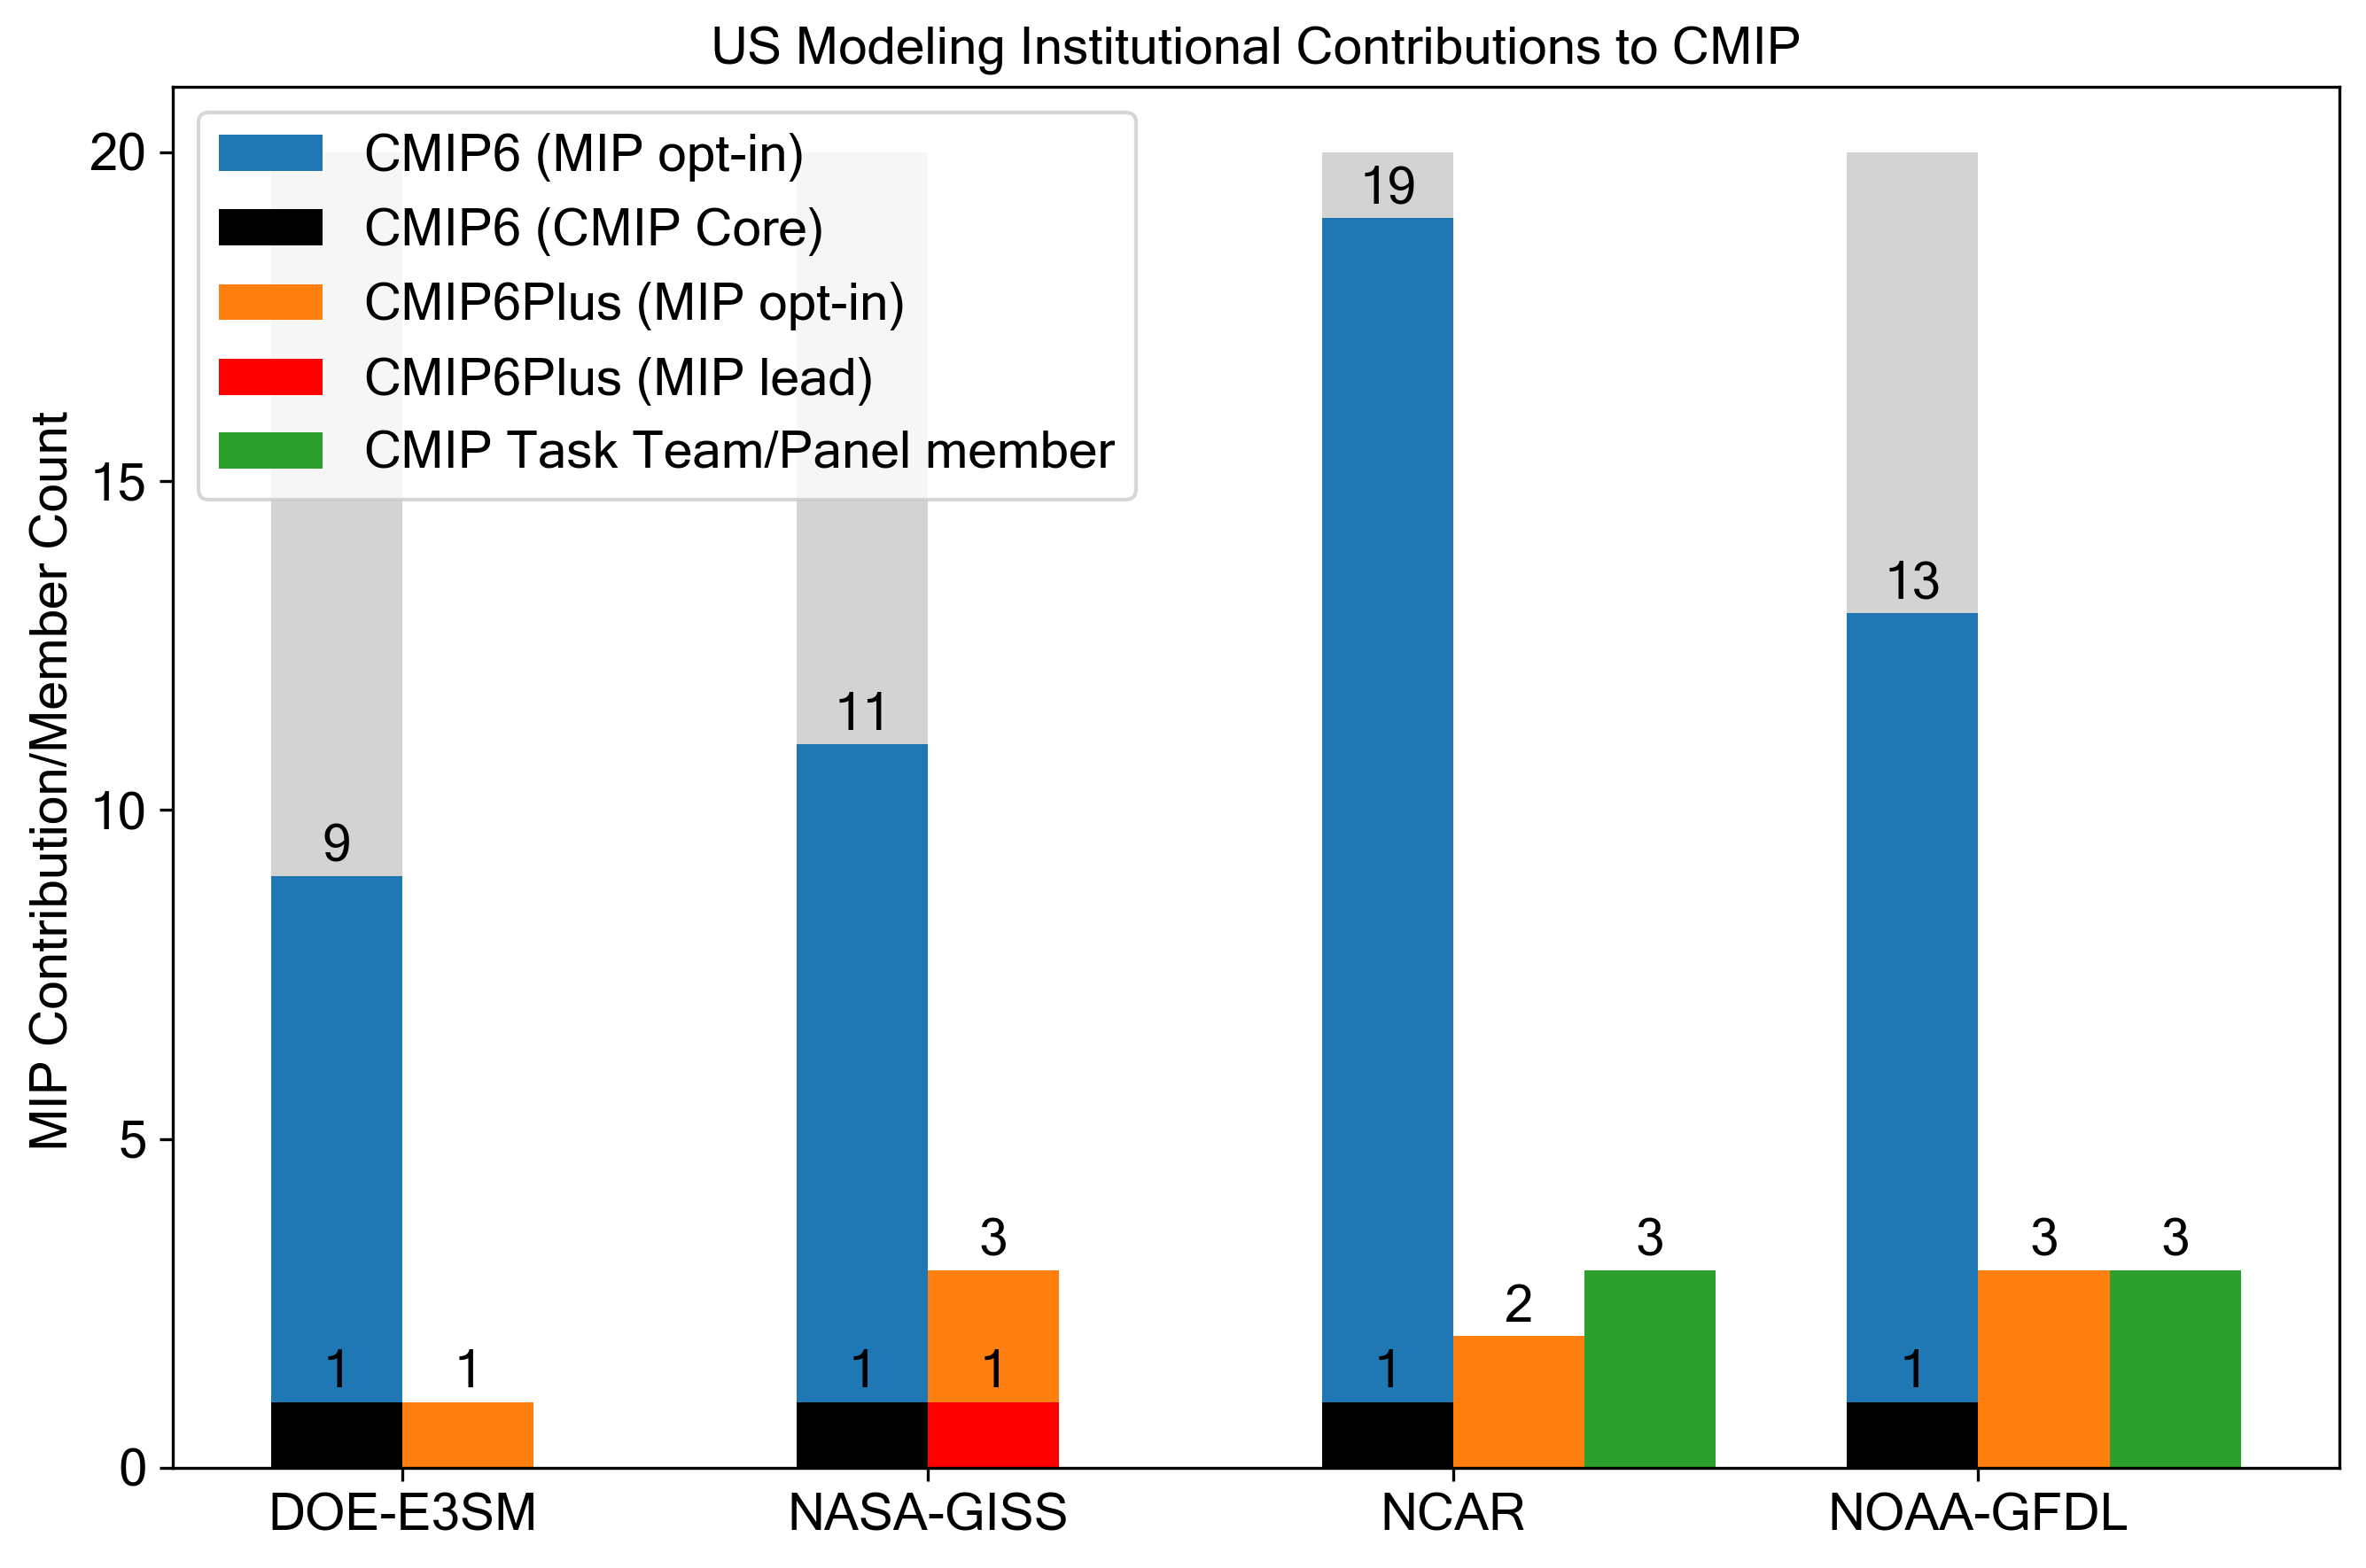

In [51]:
# set inputs
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars
fontsize = 14
fontName = "Microsoft Sans Serif"

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot
rects0 = ax.bar(x - width*.5, pad, width, label="", color="lightgrey")
rects2 = ax.bar(x - width*.5, cmip6Mips, width, label="CMIP6 (MIP opt-in)")
rects1 = ax.bar(x - width*.5, cmip, width, label="CMIP6 (CMIP Core)", color="black")  # overplot last
rects3 = ax.bar(x + width*.5, cmip6PlusMips, width, label="CMIP6Plus (MIP opt-in)")
rects4 = ax.bar(x + width*.5, cmip6PlusMipLead, width, label="CMIP6Plus (MIP lead)", color="red")
rects5 = ax.bar(x + width*1.5, cmipTaskTeamMembers, width, label="CMIP Task Team/Panel member")

# pretty things up - add text for labels, title and custom x-axis tick labels, etc.
ax.set_title('US Modeling Institutional Contributions to CMIP',
             fontname=fontName, fontsize=fontsize)
ax.set_ylabel('MIP Contribution/Member Count', fontname=fontName, fontsize=fontsize)
plt.yticks([0,5,10,15,20], fontname=fontName, fontsize=fontsize)
ax.set_xticks(x, labels, fontname=fontName, fontsize=fontsize)
ax.legend(prop={"family": fontName, "size": fontsize}, loc="upper left")

# label cleanup
padding = 1
labelSize = 14

# add labels/counts to each bar
ax.bar_label(rects2, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects3, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects1, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects4, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects5, padding=padding, fontname=fontName, fontsize=labelSize)  #, fontweight='bold')

# fill canvas
fig.tight_layout()

# display, save and close
plt.show()
fig.savefig("_".join([timeFormat,"USMIPContribution-Counts.png"]))

## Define RGMA input data

In [ ]:
#CFMIP/CMIP6 (MIP opt-in) E3SM-1-0 contribution from PCMDI/LLNL (Steve K, Mark Z and Yi Q).
#Brian Medeiros involved in CERESMIP
#Isla Simpson, Ruby Leung involved in LESFMIP.
#No DOE-RGMA involvement in RAMIP.

#The “DOE/RGMA” graphic includes those below in bold – have I double counted anywhere?

#CMIP Task Teams - https://wcrp-cmip.org/cmip7-task-teams/
#Data Access: <b>Robert Pincus</b> (U Columbia/NOAA/RGMA?), Aparna Radhakrishnan (NOAA-GFDL)
#Data Citation: <b>Sasha Ames (PCMDI)</b>, Aparna Radhakrishnan (NOAA-GFDL), 
#Data Request: <b>Charles Koven</b> (LBNL/CASCADE?)
#Climate Forcings: <b>Paul Durack</b> (PCMDI), Vaishali Naik (NOAA-GFDL), <b>John Fasullo</b> (NCAR/CATALYST?),
#Steve Smith (PNNL), Rachel Hoesly (PNNL), Mahesh Kovilakam (NASA-Langley)
#Model Benchmarking: <b>Forrest Hoffman</b> (ORNL/RUBISCO), Rebecca Beadling (Temple U/NOAA-GFDL/Princeton),
#<b>Jiwoo Lee</b> (PCMDI), <b>Brian Medeiros</b> (NCAR/CATALYST)
#Model Documentation: Diana Gergel (BlackRock Inc)
#Strategic Ensemble Design: <b>Isla Simpson</b> (NCAR/CATALYST?), Abigail Snyder (PNNL),
#Abigail Swann (U Washington) + JF Lamarque (McKinsey)

#Note for John F, Brian M and Isla S are double counts across DOE/RGMA and NCAR.

In [52]:
labels = ["DOE-E3SM", "DOE-RGMA", "NASA-GISS", "NCAR", "NOAA-GFDL"]
cmip6Mips = [9, 1, 11, 19, 13]  # CMIP6 values pulled from https://esgf-node.llnl.gov/search/cmip6/
cmip6PlusMips = [1, 1, 3, 2, 3]  # "CMIP6Plus" values pulled from CERESMIP, LESFMIP and RAMIP papers
cmip6PlusMipLead = [np.nan, np.nan, 1, np.nan, np.nan]  # Number of "CMIP5Plus" MIPs that are being institutionally led
cmipTaskTeamMembers = [np.nan, 9, np.nan, 3, 3]  # Number of members of *MIP panels and task teams
cmip = [1,]*4 ; cmip.insert(1, np.nan)  # pad a single entry - CMIP "entry card"
pad = [20,]*len(labels)  # ; pad.insert(1, np.nan)  # pad a blank entry

## Second plot - add DOE-RGMA

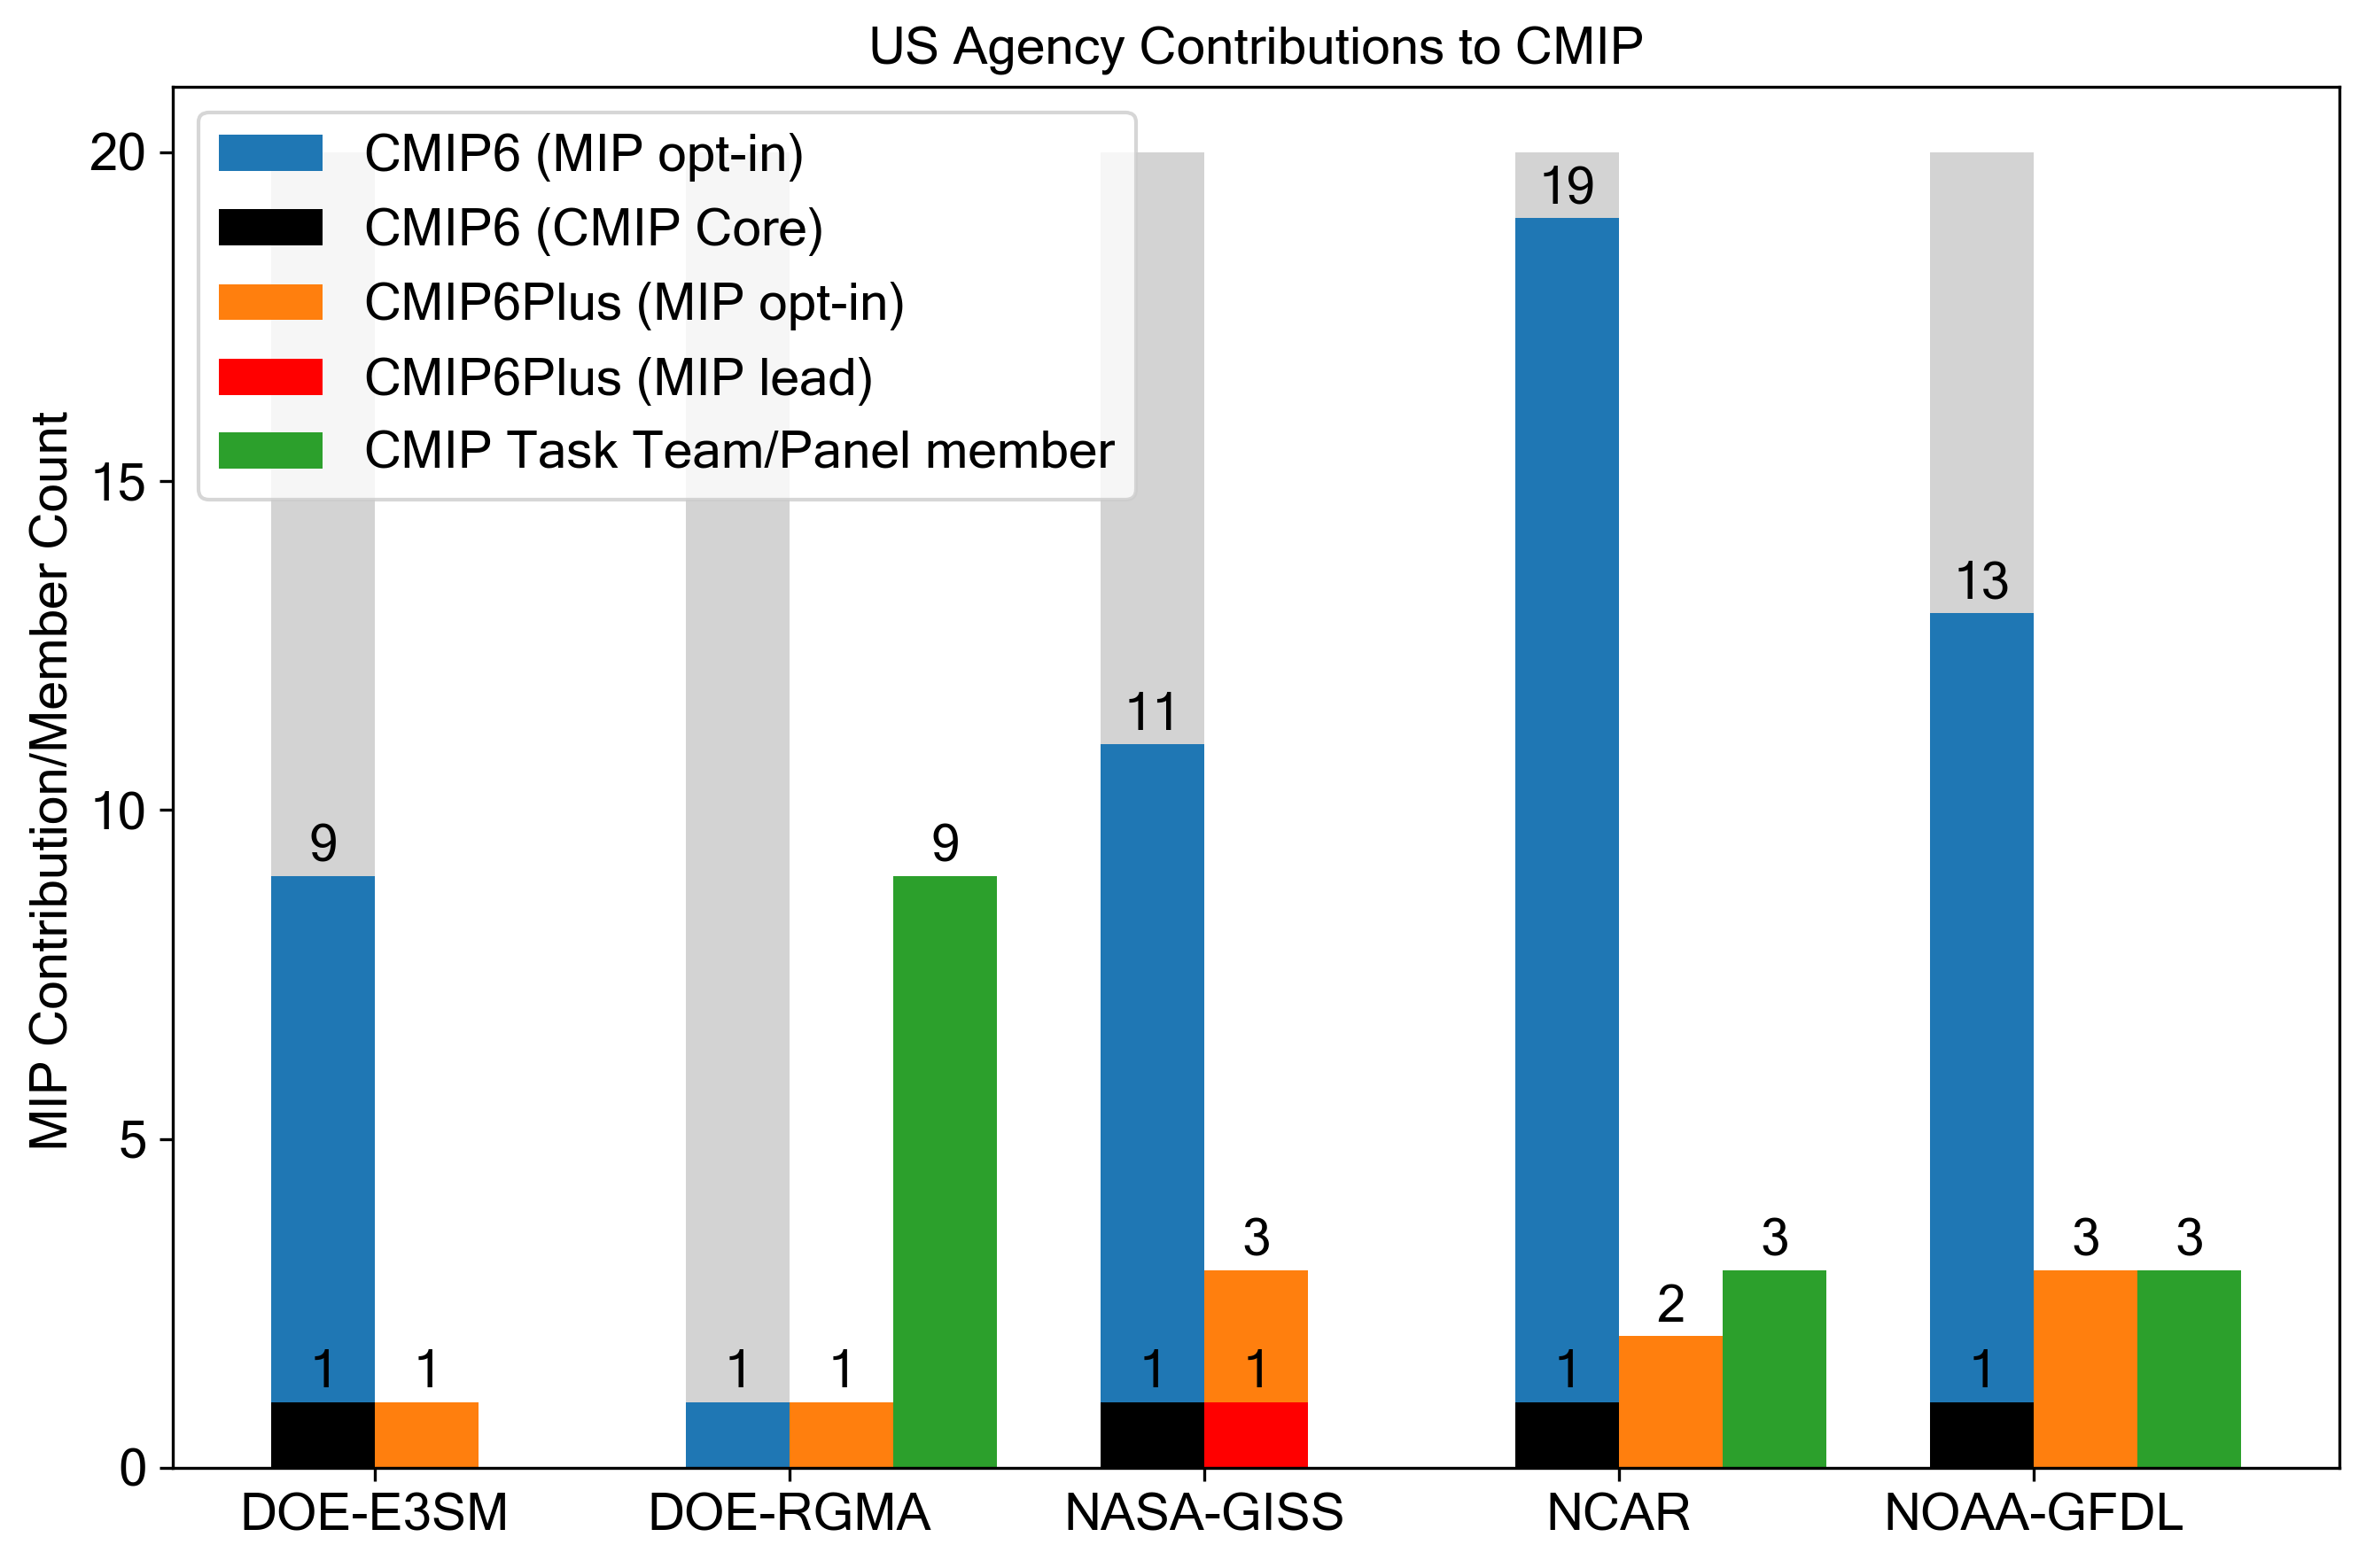

In [53]:
# set inputs
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars
fontsize = 14
fontName = "Microsoft Sans Serif"

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot
rects0 = ax.bar(x - width*.5, pad, width, label="", color="lightgrey")
rects2 = ax.bar(x - width*.5, cmip6Mips, width, label="CMIP6 (MIP opt-in)")
rects1 = ax.bar(x - width*.5, cmip, width, label="CMIP6 (CMIP Core)", color="black")  # overplot last
rects3 = ax.bar(x + width*.5, cmip6PlusMips, width, label="CMIP6Plus (MIP opt-in)")
rects4 = ax.bar(x + width*.5, cmip6PlusMipLead, width, label="CMIP6Plus (MIP lead)", color="red")
rects5 = ax.bar(x + width*1.5, cmipTaskTeamMembers, width, label="CMIP Task Team/Panel member")

# pretty things up - add text for labels, title and custom x-axis tick labels, etc.
ax.set_title('US Agency Contributions to CMIP',
             fontname=fontName, fontsize=fontsize)
ax.set_ylabel('MIP Contribution/Member Count', fontname=fontName, fontsize=fontsize)
plt.yticks([0,5,10,15,20], fontname=fontName, fontsize=fontsize)
ax.set_xticks(x, labels, fontname=fontName, fontsize=fontsize)
ax.legend(prop={"family": fontName, "size": fontsize}, loc="upper left")

# label cleanup
padding = 1
labelSize = 14

# add labels/counts to each bar
ax.bar_label(rects2, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects3, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects1, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects4, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects5, padding=padding, fontname=fontName, fontsize=labelSize)  #, fontweight='bold')

# fill canvas
fig.tight_layout()

# display, save and close
plt.show()
fig.savefig("_".join([timeFormat,"USMIPContribution-Counts-2.png"]))